# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to Prune a Classification Tree 

## 1. Import needed Libs 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Read Data 

In [5]:
loan_data = pd.read_csv("loan.csv")


## 2. Explore the Data

In [6]:
print(loan_data.head())
print(loan_data.info())
print(loan_data.isnull().sum())


   Income  Loan Amount Default
0      15            8      No
1      30            8      No
2       5            9     Yes
3      22           10      No
4      33           12      No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes
None
Income         0
Loan Amount    0
Default        0
dtype: int64


In [7]:
print(loan_data.describe().T)

             count       mean        std  min    25%   50%   75%    max
Income        30.0  18.766667   8.572946  5.0  13.00  18.0  25.5   34.0
Loan Amount   30.0  51.966667  34.055212  8.0  21.25  49.0  79.5  110.0


# Use Box Plot from seaborn on Default and income Features 

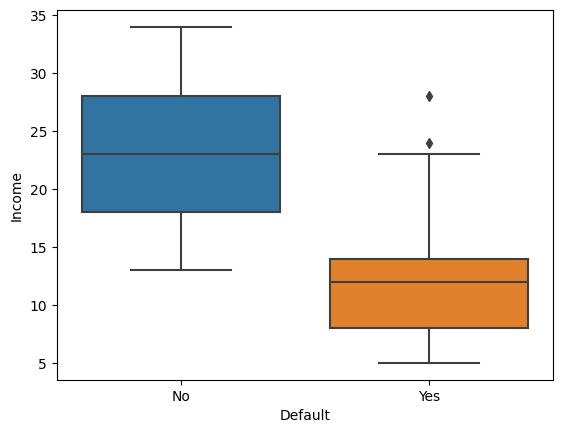

In [8]:
ax = sns.boxplot(x='Default', y='Income', data=loan_data);

# Use Box Plot from seaborn on Default and Loan Amount Features 

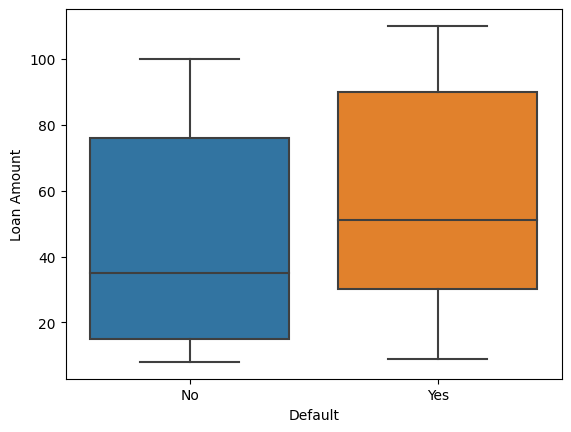

In [9]:
ax = sns.boxplot(x='Default', y='Loan Amount', data=loan_data);

# Use Scatter Plot from seaborn 

<Axes: xlabel='Income', ylabel='Loan Amount'>

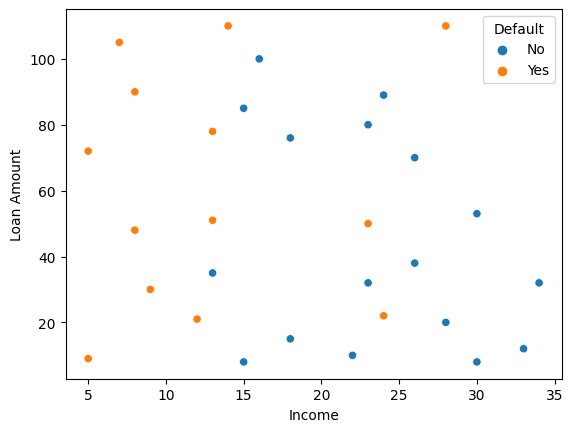

In [10]:
sns.scatterplot(x='Income', y='Loan Amount', hue='Default', data=loan_data) 

## 3. Prepare the Data

In [11]:

X = loan_data[['Income', 'Loan Amount']]
y = loan_data['Default'] 

# Split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Print the shape of the splitted data

In [13]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

### Import the Dt classifier from Sklearn

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### Fit the model

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Predict 

In [16]:
y_pred = dt.predict(X_test)

### score of the model

In [17]:
score = dt.score(X_test, y_test)
print(score)

0.5


## 6. Prune the Classification Tree

### Now use the grid Search over the decision tree 
### parameters to be changed "max_depth" "min_samples_split" "min_samples_leaf"

### Evaluation: answer this question after u apply the grid search (Overfit or not - based on Score from the decision tree and after the gridsearch

In [22]:
param_grid = {'max_depth': [2, 3, 4, 5],
            'min_samples_split': [2, 3, 4],
            'min_samples_leaf': [1, 2, 3,4,5,6,]
            }
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [24]:
best_params = grid_search.best_params_
print(best_params)

pruned_dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
pruned_dt.fit(X_train, y_train)
pruned_score = pruned_dt.score(X_test, y_test)
print(pruned_score)

{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.6666666666666666


## **leave ur answer for the above question here**